## [75.06 / 95.58] Organización de Datos
## Trabajo Práctico 1: Análisis Exploratorio de Datos
### Grupo 18: DATAVID-20

* 102732 - Bilbao, Manuel
* 101933 - Karagoz, Filyan
* 98684 - Markarian, Darío
* 100901 - Stroia, Lautaro

## 1. Importación general de librerias y set-up de datos.

In [22]:
from geotext import GeoText
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly
import re
import re as re
import seaborn as sns
import string
pd.options.display.max_rows = None

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs
dataframe = pd.read_csv('train.csv')
dataframe['keyword'] = dataframe['keyword'].apply(lambda x: re.sub(r'%20',' ', str(x)))

In [23]:
stemmer = SnowballStemmer("english")
dataframe['keyword'] = dataframe['keyword'].apply(lambda x: stemmer.stem(str(x)))
count_df = dataframe.groupby(['keyword','target']).count()

In [31]:
count_df

id  location  text
keyword           target                     
ablaz             0        23        17    23
                  1        13        12    13
accid             0        11         7    11
                  1        24        21    24
aftershock        0        34        25    34
airplane accid    0         5         5     5
                  1        30        24    30
ambul             0        18        14    18
                  1        20        12    20
annihil           0        42        27    42
                  1        21        11    21
apocalyps         0        23        11    23
                  1         9         6     9
armageddon        0        37        28    37
                  1         5         4     5
armi              0        29        12    29
                  1         5         3     5
arson             0        10         9    10
                  1        22        13    22
arsonist          0        26        21    26
                  1         8         7     8
attack            0        25        20    25
                  1        46        33    46
avalanch          0        26        21    26
                  1         4         2     4
battl             0        21        16    21
                  1         5         3     5
bioterror         0        24        13    24
                  1        43        26    43
blaze             0        66        39    66
                  1         6         6     6
bleed             0        30        17    30
                  1         5         4     5
blew up           0        31        21    31
                  1         2         0     2
blight            0        30        24    30
                  1         2         2     2
blizzard          0        33        16    33
                  1         4         3     4
blood             0        30        15    30
                  1         5         4     5
bloodi            0        32        25    32
                  1         3         3     3
blown up          0        28        21    28
                  1         5         5     5
body bag          0       100        62   100
                  1         7         6     7
bomb              0        40        24    40
                  1        61        37    61
bridge collaps    0         6         4     6
                  1        29        16    29
buildings burn    0        11         7    11
                  1        24        18    24
buildings on fir  0         5         4     5
                  1        28        25    28
burn              0        50        29    50
                  1        17        12    17
burning build     0        16        10    16
                  1        21        18    21
bush fir          0         7         3     7
                  1        18        14    18
casualti          0        26        17    26
                  1        43        30    43
catastroph        0        39        26    39
                  1        27        16    27
chemical emerg    0        18        13    18
                  1        15        13    15
cliff fal         0        28        20    28
                  1         8         5     8
collaps           0        41        34    41
                  1        28        21    28
collid            0        48        34    48
                  1        26        20    26
collis            0        10        10    10
                  1        29        26    29
crash             0        34        17    34
                  1        33        21    33
crush             0        60        39    60
                  1         8         3     8
curfew            0        32        22    32
                  1         5         4     5
cyclon            0        13         9    13
                  1        19        12    19
damag             0        22        15    22
                  1        19        15    19
danger            0      

In [24]:
modified_locations_dataframe = dataframe
modified_locations_dataframe['location']=modified_locations_dataframe['location'].apply(lambda x: '' if len((GeoText(str(x)).cities)+(GeoText(str(x)).countries))==0 else ','.join((GeoText(str(x)).cities)+(GeoText(str(x)).countries)))



In [25]:
places_with_most_tweets = modified_locations_dataframe['location'].value_counts().reset_index()

In [26]:
','.join(GeoText(str('Buenos Aires, Argentina')).cities+(GeoText(str('Buenos Aires, Argentina')).countries))

'Buenos Aires,Argentina'

In [34]:
dataframe = dataframe[dataframe['keyword']!='nan']

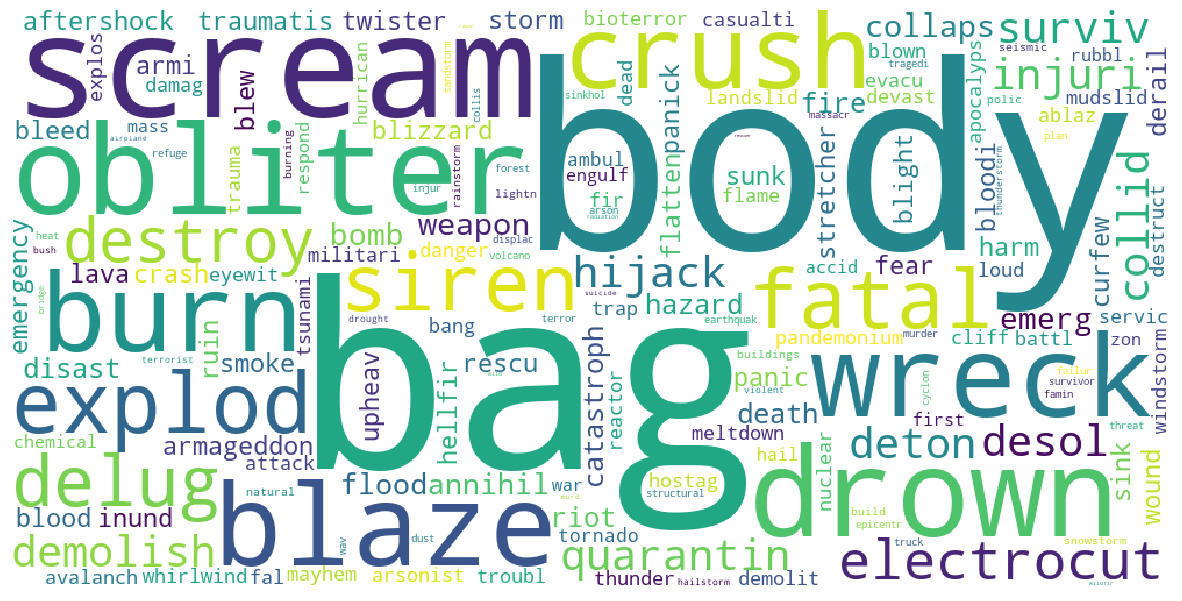

In [38]:
dataframe_false = dataframe[dataframe['target']==0]
unique_string=' '
unique_string = ','.join(dataframe_false['keyword'].to_list())
wordcloud = WordCloud(background_color='white',width = 1000, height = 500,collocations=False).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

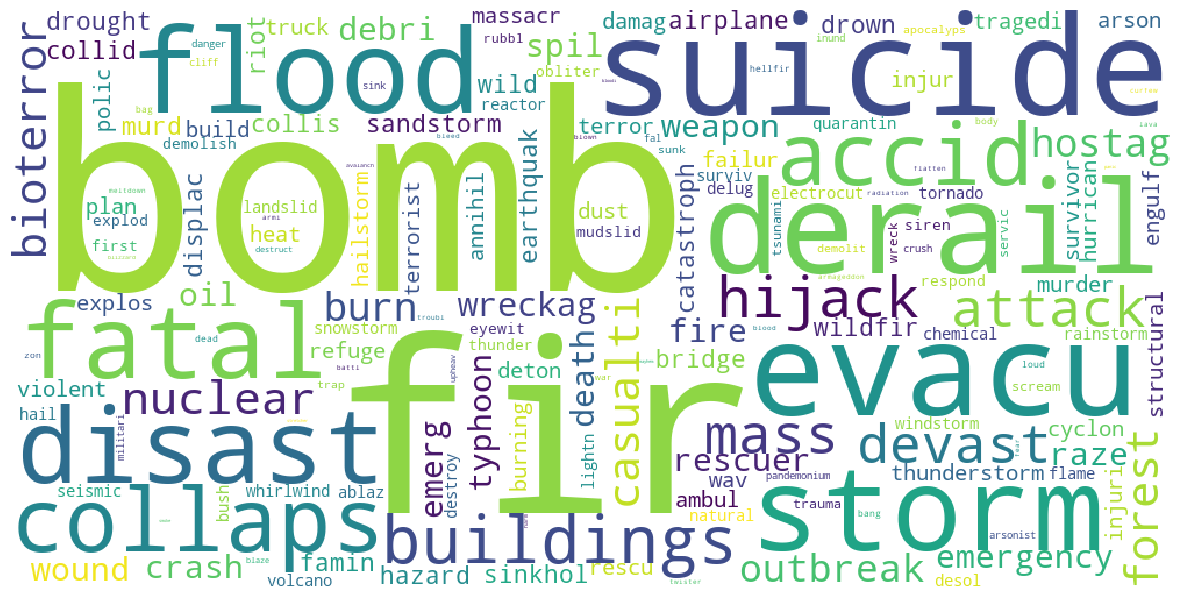

In [39]:
dataframe_true = dataframe[dataframe['target']==1]
unique_string=' '
unique_string = ','.join(dataframe_true['keyword'].to_list())
wordcloud = WordCloud(background_color='white',width = 1000, height = 500,collocations=False).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()